In [26]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import random
import csv
import dill as pickle

import pypsa

%matplotlib inline

In [27]:
nw = pypsa.Network()

In [28]:
nw.set_snapshots([p for p in range(10)])

In [29]:
cur_path = r"C:\Users\janni\OneDrive\TU Berlin\4 - Abschlussarbeiten\01 - Bachelorarbeit\modell\data\\"

In [31]:
for i in range(3):
    nw.add("Bus","My bus {}".format(i))
    
for i in range(3):
    nw.add("Line","My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%3),
                x=0.0001,
                s_nom=60000)

In [32]:
for i in range(2):
    nw.add("Load", "My load {0}".format(i),
           bus="My bus {0}".format(i+1),
           p_set=[2000 for p in range(len(nw.snapshots))])

In [33]:
nw.add("Generator", name="backup",
       bus="My bus 0",
       carrier="gas",
       #marginal_cost=20,
       p_nom="20000",
       committable=True)

 =====================================================================

In [34]:
power = 2000
av = [random.randint(0, power) for p in range(len(nw.snapshots))]

In [35]:
nw.add("Generator", name="Offshore Nordsee",
       bus="My bus 1",
       carrier="wind",
       marginal_cost=500,
       p_nom=power,
       p_min_pu=[p/power for p in av],
       p_max_pu=[p/power for p in av],
       committable=False)

 =====================================================================

In [36]:
nw.lopf(nw.snapshots, solver_name="gurobi")

INFO:pypsa.pf:Slack bus for sub-network 0 is My bus 0
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `angles` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x91
  Lower bound: 5598500.0
  Upper bound: 5598500.0
  Number of objectives: 1
  Number of constraints: 151
  Number of variables: 91
  Number of binary variables: 10
  Number of integer variables: 10
  Number of continuous variables: 81
  Number of nonzeros: 271
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optim

('ok', 'optimal')

In [37]:
nw.objective

5598500.0

In [38]:
nw.generators_t.p.T

,0,1,2,3,4,5,6,7,8,9
backup,3693.0,2650.0,2399.0,2774.0,3539.0,3151.0,3163.0,2958.0,2075.0,2401.0
Offshore Nordsee,307.0,1350.0,1601.0,1226.0,461.0,849.0,837.0,1042.0,1925.0,1599.0


Text(0,0.5,'MW')

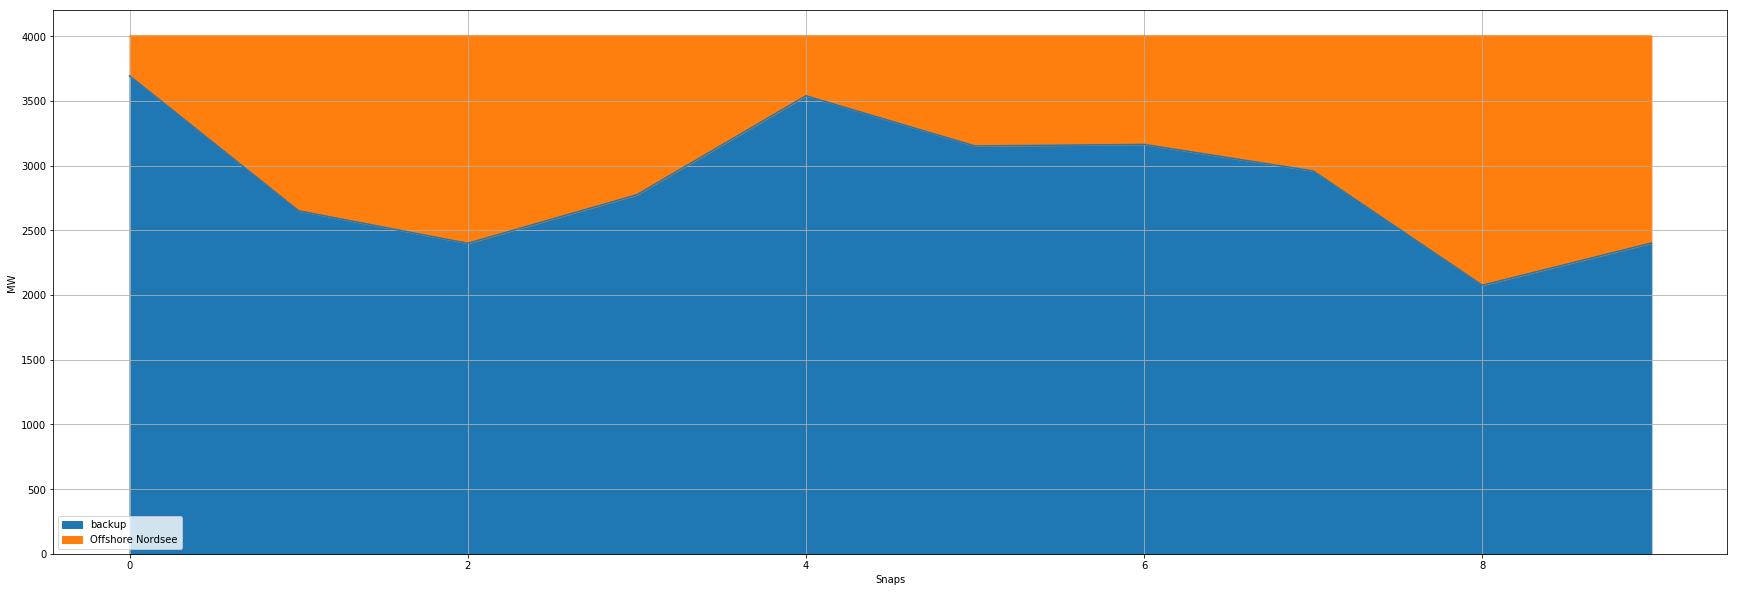

In [39]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,10)

(nw.generators_t.p).plot(kind="area",ax=ax, grid=True)

ax.set_xlabel("Snaps")
ax.set_ylabel("MW")

In [40]:
with open("results.csv", "r+", newline="") as csvfile:
    resfile = csv.writer(csvfile)
    resfile.writerow("Halloo")

In [41]:
f = open("testing.pickle", 'wb')
pickle.dump(nw, f)
f.close()